<a href="https://colab.research.google.com/github/justin66744/beats-customer-insights-project/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
text = "The headset is amazing, but the battery life could be better."
blob = TextBlob(text)

print(blob.sentiment)

Sentiment(polarity=0.55, subjectivity=0.7)


In [3]:
df = pd.read_csv('final_dataset.csv')

print(df.head())

        review_id  product_id  \
0   RUE030N50F9EJ  B09PYVXXW5   
1  R385JSD6KWP2QU  B09PYVXXW5   
2  R1UB1V4EPP9MN3  B09PYVXXW5   
3   RWYK1GXIVV6H1  B09PYVXXW5   
4  R3FBQBGQM3II4W  B09PYVXXW5   

                                               title    author  rating  \
0  5.0 out of 5 stars Really good with a couple o...       CTM       5   
1  4.0 out of 5 stars I wish I could rate 5 stars...    Gianna       4   
2  5.0 out of 5 stars Basically perfect, fantasti...  Colin M.       5   
3            1.0 out of 5 stars Decent but Defective    Aquila       1   
4   3.0 out of 5 stars I went with soundcore instead   Frankie       3   

                                             content  \
0  I love TWS earbuds. I have many including buds...   
1  …I just can’t. Because as useful as these earb...   
2  I needed a replacement for my Galaxy buds pro'...   
3  UPDATE 6/24/22: As of 6/23/22, my replacement ...   
4  So out of the box these tiny buds surprised me...   

                   

In [4]:
df['Polarity'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

print(df.head())

        review_id  product_id  \
0   RUE030N50F9EJ  B09PYVXXW5   
1  R385JSD6KWP2QU  B09PYVXXW5   
2  R1UB1V4EPP9MN3  B09PYVXXW5   
3   RWYK1GXIVV6H1  B09PYVXXW5   
4  R3FBQBGQM3II4W  B09PYVXXW5   

                                               title    author  rating  \
0  5.0 out of 5 stars Really good with a couple o...       CTM       5   
1  4.0 out of 5 stars I wish I could rate 5 stars...    Gianna       4   
2  5.0 out of 5 stars Basically perfect, fantasti...  Colin M.       5   
3            1.0 out of 5 stars Decent but Defective    Aquila       1   
4   3.0 out of 5 stars I went with soundcore instead   Frankie       3   

                                             content  \
0  I love TWS earbuds. I have many including buds...   
1  …I just can’t. Because as useful as these earb...   
2  I needed a replacement for my Galaxy buds pro'...   
3  UPDATE 6/24/22: As of 6/23/22, my replacement ...   
4  So out of the box these tiny buds surprised me...   

                   

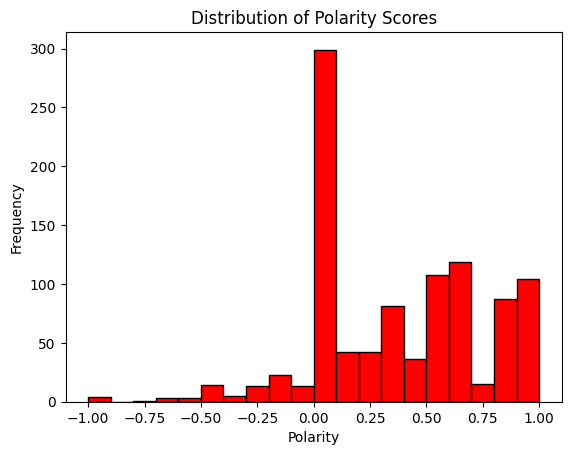

In [5]:
plt.hist(df['Polarity'], bins=20, color='red', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

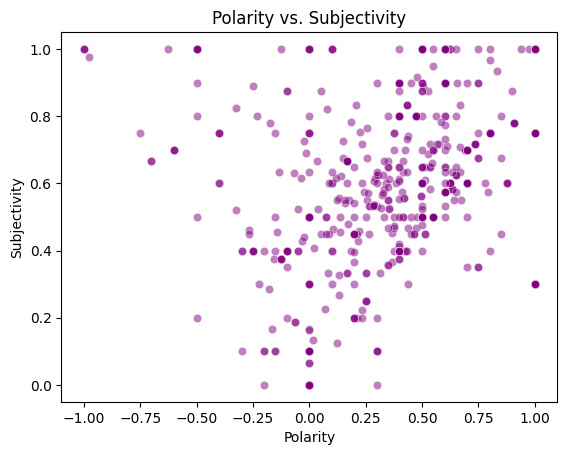

In [6]:
sns.scatterplot(x='Polarity', y='Subjectivity', data=df, alpha=0.5, color='purple')
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [7]:
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'
df['Sentiment'] = df['Polarity'].apply(categorize_sentiment)

print(df['Sentiment'].value_counts())

Sentiment
Positive    592
Neutral     381
Negative     39
Name: count, dtype: int64


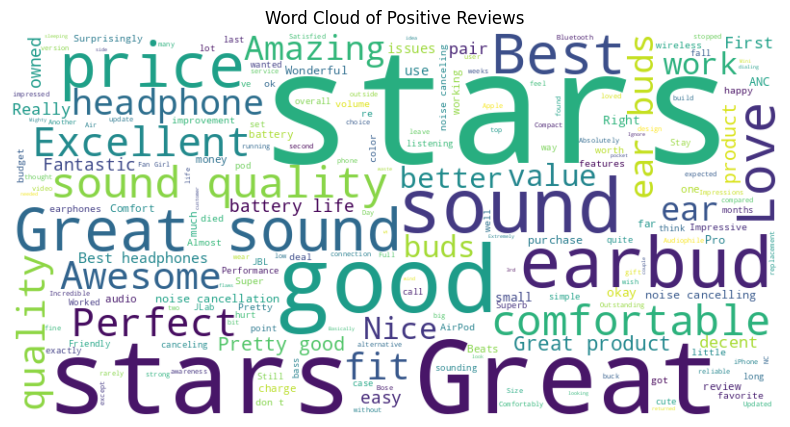

In [8]:
positive_reviews = " ".join(df[df['Sentiment'] == 'Positive']['title'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

In [ ]:
df.to_csv('headphones_sentiment.csv', index=False)